# 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 데이터 전처리

## 관광 소비 - consume_2023

In [3]:
import numpy as np
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['consume_2023']
data = collection.find()
df_consume = pd.DataFrame(data)
df_consume[:5]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
0,65d866b9bb908e26c802b17a,쇼핑업,면세점,1.923002e+08,인천
1,65d866b9bb908e26c802b17b,쇼핑업,관광기념품,1.809399e+06,인천
2,65d866b9bb908e26c802b17c,쇼핑업,레저용품쇼핑,1.117589e+08,인천
3,65d866b9bb908e26c802b17d,쇼핑업,대형쇼핑몰,4.024763e+08,인천
4,65d866b9bb908e26c802b17e,숙박업,호텔,3.535387e+07,인천


### 1번 중간 점검 : 지역별 상위 1-3위 소비 항목
- 결측치와 이상치 확인
- 전체적인 컬럼 확인
- 지역구분 컬럼 확인
- 업종대분류명 컬럼 확인
  - 쇼핑업 ('면세점', '관광기념품', '레저용품쇼핑', '대형쇼핑몰')
  - 숙박업 ('호텔', '콘도', '캠핑장/펜션', '기타숙박')
  - 식음료업
  - 여가서비스업 ('관광유원시설', '골프장', '기타레저', '문화서비스', '스키장', '카지노')
  - 여행업
  - 운송업 ('수상운송', '항공운송', '렌터카', '육상운송')
- 인천 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 면세점
- 부산 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 레저용품쇼핑
- 서울 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 항공운송
- 제주 -> 가장 많이 소비하는 항목 : 식음료, 면세점, 골프장
- 강원 -> 가장 많이 소비하는 항목 : 식음료, 골프장, 콘도

In [4]:
# 결측치와 이상치 확인     -> 없음 확인
df_consume.isnull().sum()

_id            0
업종대분류명         0
업종중분류명         0
중분류 소비액(천원)    0
지역구분           0
dtype: int64

In [5]:
# 전체적인 컬럼 확인     -> '_id', '업종대분류명', '업종중분류명', '중분류 소비액(천원)', '지역구분'
df_consume.columns

Index(['_id', '업종대분류명', '업종중분류명', '중분류 소비액(천원)', '지역구분'], dtype='object')

In [6]:
# 지역구분 컬럼 확인     -> '인천', '부산', '서울', '제주', '강원'
df_consume['지역구분'].unique()

array(['인천', '부산', '서울', '제주', '강원'], dtype=object)

In [7]:
# 컬럼    -> '쇼핑업', '숙박업', '식음료업', '여가서비스업', '여행업', '운송업'
df_consume['업종대분류명'].unique()

array(['쇼핑업', '숙박업', '식음료업', '여가서비스업', '여행업', '운송업'], dtype=object)

In [8]:
# 쇼핑업 컬럼 확인     -> '면세점', '관광기념품', '레저용품쇼핑', '대형쇼핑몰'
df_consume[df_consume['업종대분류명'] == '쇼핑업']['업종중분류명'].unique()

array(['면세점', '관광기념품', '레저용품쇼핑', '대형쇼핑몰'], dtype=object)

In [9]:
# 숙박업 컬럼 확인    -> '호텔', '콘도', '캠핑장/펜션', '기타숙박'
df_consume[df_consume['업종대분류명'] == '숙박업']['업종중분류명'].unique()

array(['호텔', '콘도', '캠핑장/펜션', '기타숙박'], dtype=object)

In [10]:
# 식음료업 컬럼 확인   -> '식음료'
df_consume[df_consume['업종대분류명'] == '식음료업']['업종중분류명'].unique()

array(['식음료'], dtype=object)

In [11]:
# 여가서비스업 컬럼 확인      -> '관광유원시설', '골프장', '기타레저', '문화서비스', '스키장', '카지노'
df_consume[df_consume['업종대분류명'] == '여가서비스업']['업종중분류명'].unique()

array(['관광유원시설', '골프장', '기타레저', '문화서비스', '스키장', '카지노'], dtype=object)

In [12]:
# 여행업 컬럼 확인    -> '여행업'
df_consume[df_consume['업종대분류명'] == '여행업']['업종중분류명'].unique()

array(['여행업'], dtype=object)

In [13]:
# 운송업 컬럼 확인     -> '수상운송', '항공운송', '렌터카', '육상운송'
df_consume[df_consume['업종대분류명'] == '운송업']['업종중분류명'].unique()

array(['수상운송', '항공운송', '렌터카', '육상운송'], dtype=object)

In [14]:
# 인천     -> 가장 많이 소비하는 항목 : 식음료업, 쇼핑업, 여가서비스업
df_consume_IC = df_consume[df_consume['지역구분'] == '인천'].sort_values('중분류 소비액(천원)', ascending=False)
df_consume_IC[:5]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
8,65d866b9bb908e26c802b182,식음료업,식음료,1.094968e+09,인천
3,65d866b9bb908e26c802b17d,쇼핑업,대형쇼핑몰,4.024763e+08,인천
0,65d866b9bb908e26c802b17a,쇼핑업,면세점,1.923002e+08,인천
2,65d866b9bb908e26c802b17c,쇼핑업,레저용품쇼핑,1.117589e+08,인천
10,65d866b9bb908e26c802b184,여가서비스업,골프장,7.042452e+07,인천


In [54]:
# 부산     -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 레저용품쇼핑
df_consume_BS = df_consume[df_consume['지역구분'] == '부산'].sort_values('중분류 소비액(천원)', ascending=False)
df_consume_BS[:10]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
26,65d866b9bb908e26c802b194,식음료업,식음료,1.572065e+09,부산
21,65d866b9bb908e26c802b18f,쇼핑업,대형쇼핑몰,1.169068e+09,부산
20,65d866b9bb908e26c802b18e,쇼핑업,레저용품쇼핑,9.479305e+07,부산
34,65d866b9bb908e26c802b19c,운송업,항공운송,8.322821e+07,부산
27,65d866b9bb908e26c802b195,여가서비스업,골프장,6.529713e+07,부산
22,65d866b9bb908e26c802b190,숙박업,호텔,6.322619e+07,부산
24,65d866b9bb908e26c802b192,숙박업,기타숙박,5.456122e+07,부산
18,65d866b9bb908e26c802b18c,쇼핑업,면세점,2.727580e+07,부산
28,65d866b9bb908e26c802b196,여가서비스업,기타레저,2.468120e+07,부산
29,65d866b9bb908e26c802b197,여가서비스업,문화서비스,1.459360e+07,부산


In [53]:
# 서울     -> 가장 많이 소비하는 항목 : 식음료, 데형쇼핑몰, 항공운송
df_consume_SU = df_consume[df_consume['지역구분'] == '서울'].sort_values('중분류 소비액(천원)', ascending=False)
df_consume_SU[:10]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
44,65d866b9bb908e26c802b1a6,식음료업,식음료,6.706266e+09,서울
39,65d866b9bb908e26c802b1a1,쇼핑업,대형쇼핑몰,3.153516e+09,서울
51,65d866b9bb908e26c802b1ad,운송업,항공운송,6.125839e+08,서울
38,65d866b9bb908e26c802b1a0,쇼핑업,레저용품쇼핑,4.710455e+08,서울
52,65d866b9bb908e26c802b1ae,운송업,육상운송,3.925824e+08,서울
40,65d866b9bb908e26c802b1a2,숙박업,호텔,2.665010e+08,서울
48,65d866b9bb908e26c802b1aa,여가서비스업,문화서비스,2.078447e+08,서울
36,65d866b9bb908e26c802b19e,쇼핑업,면세점,1.276294e+08,서울
41,65d866b9bb908e26c802b1a3,숙박업,기타숙박,1.272273e+08,서울
46,65d866b9bb908e26c802b1a8,여가서비스업,골프장,1.227195e+08,서울


In [52]:
# 제주     -> 가장 많이 소비하는 항목 : 식음료, 면세점, 골프장
df_consume_JJ = df_consume[df_consume['지역구분'] == '제주'].sort_values('중분류 소비액(천원)', ascending=False)
df_consume_JJ[:10]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
63,65d866b9bb908e26c802b1b9,식음료업,식음료,4.536980e+08,제주
55,65d866b9bb908e26c802b1b1,쇼핑업,면세점,1.666889e+08,제주
65,65d866b9bb908e26c802b1bb,여가서비스업,골프장,6.811381e+07,제주
71,65d866b9bb908e26c802b1c1,운송업,항공운송,6.523355e+07,제주
59,65d866b9bb908e26c802b1b5,숙박업,호텔,6.442682e+07,제주
60,65d866b9bb908e26c802b1b6,숙박업,콘도,4.430448e+07,제주
62,65d866b9bb908e26c802b1b8,숙박업,기타숙박,4.307137e+07,제주
57,65d866b9bb908e26c802b1b3,쇼핑업,레저용품쇼핑,4.183472e+07,제주
56,65d866b9bb908e26c802b1b2,쇼핑업,관광기념품,3.353351e+07,제주
58,65d866b9bb908e26c802b1b4,쇼핑업,대형쇼핑몰,3.318091e+07,제주


In [18]:
# 강원     -> 가장 많이 소비하는 항목 : 식음료, 골프장, 콘도
df_consume_GW = df_consume[df_consume['지역구분'] == '강원'].sort_values('중분류 소비액(천원)', ascending=False)
df_consume_GW[:5]

,_id,업종대분류명,업종중분류명,중분류 소비액(천원),지역구분
82,65d866b9bb908e26c802b1cc,식음료업,식음료,7.474988e+08,강원
84,65d866b9bb908e26c802b1ce,여가서비스업,골프장,1.677711e+08,강원
79,65d866b9bb908e26c802b1c9,숙박업,콘도,9.706013e+07,강원
75,65d866b9bb908e26c802b1c5,쇼핑업,레저용품쇼핑,8.134143e+07,강원
76,65d866b9bb908e26c802b1c6,쇼핑업,대형쇼핑몰,8.008767e+07,강원


## ------------------------------------------------------------------------

## 관광 소비 추이 - consume_transition_2023

In [19]:
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['consume_transition_2023']
data = collection.find()
df_consume_transition = pd.DataFrame(data)
df_consume_transition[:5]

,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802a96a,202312,전체,174935427.0,인천
1,65d86688bb908e26c802a96b,202301,전체,156103505.0,인천
2,65d86688bb908e26c802a96c,202302,전체,148694606.0,인천
3,65d86688bb908e26c802a96d,202303,전체,164691002.0,인천
4,65d86688bb908e26c802a96e,202304,전체,172693160.0,인천


In [20]:
condition_IC = "지역구분 == '인천'"
condition_BS = "지역구분 == '부산'"
condition_SU = "지역구분 == '서울'"
condition_JJ = "지역구분 == '제주'"
condition_GW = "지역구분 == '강원'"

### 2번 중간 점검 : 지역별 소비액이 가장 높은 항목을 전체에서 %인지 비교
- 결측치와 이상치 확인
- 전체적인 컬럼 확인
- 지역구분 컬럼 확인
- 업종대분류명 컬럼 확인
- 지역별 & 월별 소비액이 가장 높은 항목 1위 - 3위
  - 인천 : 식음료업, 쇼핑업 / 1월,12월 제외하고 여가서비스업 순으로 많음.
  - 부산 : 식음료업, 쇼핑업 / 3,4,6,9,10월 제외하고 숙박업 순으로 많음.
  - 서울 : 식음료업, 쇼핑업, 운송업
  - 제주 : 식음료업, 쇼핑업, 숙박업
  - 강원 : 식음료업, 3월 - 11월까지 여가서비스업이 대략 2위를 차지한다.

In [21]:
# 결측치와 이상치 확인     -> 없음 확인
df_consume_transition.isnull().sum()

_id        0
기준연월       0
업종대분류명     0
소비액(천원)    0
지역구분       0
dtype: int64

In [22]:
# 전체적 컬럼 확인     -> '_id', '기준연월', '업종대분류명', '소비액(천원)', '지역구분'
df_consume_transition.columns

Index(['_id', '기준연월', '업종대분류명', '소비액(천원)', '지역구분'], dtype='object')

In [23]:
# 지역구분 컬럼 확인     -> '인천', '부산', '서울', '제주', '강원'
df_consume_transition['지역구분'].unique()

array(['인천', '부산', '서울', '제주', '강원'], dtype=object)

In [24]:
# 컬럼    -> '전체', '운송업', '여행업', '숙박업', '식음료업', '여가서비스업', '쇼핑업'
df_consume_transition['업종대분류명'].unique()

array(['전체', '운송업', '여행업', '숙박업', '식음료업', '여가서비스업', '쇼핑업'], dtype=object)

In [25]:
df_consume_transition.query(condition_IC)

,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802a96a,202312,전체,174935427.0,인천
1,65d86688bb908e26c802a96b,202301,전체,156103505.0,인천
2,65d86688bb908e26c802a96c,202302,전체,148694606.0,인천
3,65d86688bb908e26c802a96d,202303,전체,164691002.0,인천
4,65d86688bb908e26c802a96e,202304,전체,172693160.0,인천
...,...,...,...,...,...
79,65d86688bb908e26c802a9b9,202305,운송업,4431657.0,인천
80,65d86688bb908e26c802a9ba,202305,여행업,40797.0,인천
81,65d86688bb908e26c802a9bb,202305,숙박업,5638931.0,인천
82,65d86688bb908e26c802a9bc,202304,식음료업,94262228.0,인천


In [26]:
# 업종대분류명에서 전체 행을 제거 후 각 항목별 % 확인
df_consume_transition_drop = df_consume_transition[df_consume_transition['업종대분류명'] != '전체']
IC_visitors = df_consume_transition_drop.query(condition_IC).groupby('업종대분류명')['소비액(천원)'].sum().sort_values(ascending=False)
sum_IC = IC_visitors.sum()
percentages_IC = (IC_visitors / sum_IC) * 100
percentages_IC

업종대분류명
식음료업      54.369566
쇼핑업       35.172158
여가서비스업     5.126200
숙박업        3.414940
운송업        1.900736
여행업        0.016399
Name: 소비액(천원), dtype: float64

In [27]:
# 인천 & 소비액이 가장 높은 항목 1위 - 3위
df_consume_transition_IC_filter = df_consume_transition[(df_consume_transition['업종대분류명'] != '전체') & (df_consume_transition['지역구분'] == '인천')]
IC_top3_sectors = (
    df_consume_transition_IC_filter.groupby('기준연월')
    .apply(lambda x: x.nlargest(3, '소비액(천원)'))
    .reset_index(drop=True)
)
IC_top3_sectors[:10]
# IC_top3_sectors['월별_분류명']=IC_top3_sectors['기준연월'].astype(str)+'_'+IC_top3_sectors['업종대분류명']
# IC_top3_sectors

/tmp/ipykernel_86/1898421299.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, '소비액(천원)'))


,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802a9a5,202301,식음료업,84806064.0,인천
1,65d86688bb908e26c802a9a7,202301,쇼핑업,57554835.0,인천
2,65d86688bb908e26c802a9b4,202301,숙박업,5913636.0,인천
3,65d86688bb908e26c802a994,202302,식음료업,83989650.0,인천
4,65d86688bb908e26c802a9a1,202302,쇼핑업,50948382.0,인천
5,65d86688bb908e26c802a9a0,202302,여가서비스업,5742183.0,인천
6,65d86688bb908e26c802a999,202303,식음료업,91062428.0,인천
7,65d86688bb908e26c802a99b,202303,쇼핑업,57799925.0,인천
8,65d86688bb908e26c802a99a,202303,여가서비스업,7971954.0,인천
9,65d86688bb908e26c802a9bc,202304,식음료업,94262228.0,인천


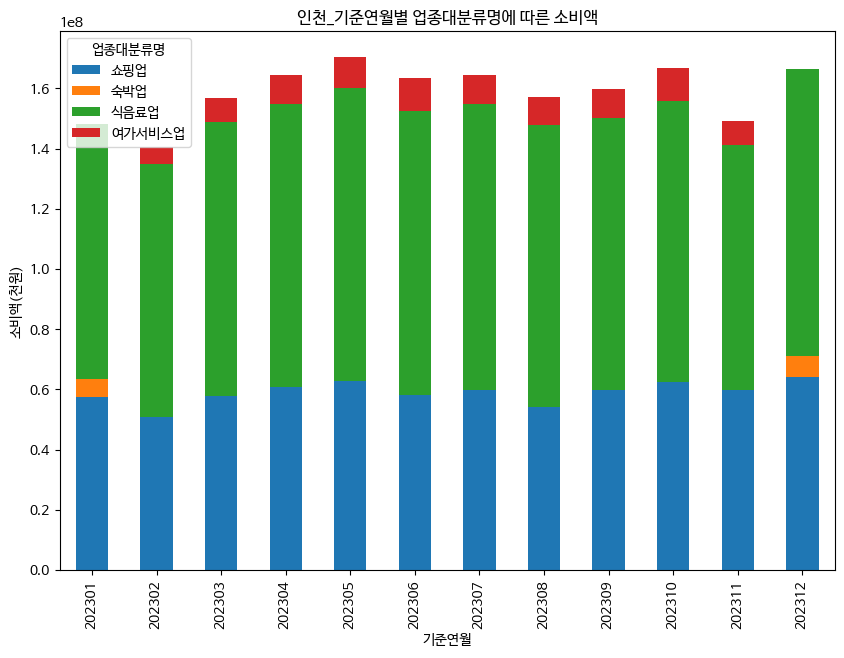

In [28]:
pivot_IC_top3_sectors = IC_top3_sectors.pivot_table(index='기준연월', columns='업종대분류명', values='소비액(천원)', aggfunc='sum')
pivot_IC_top3_sectors.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('인천_기준연월별 업종대분류명에 따른 소비액')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.legend(title='업종대분류명')
plt.show()

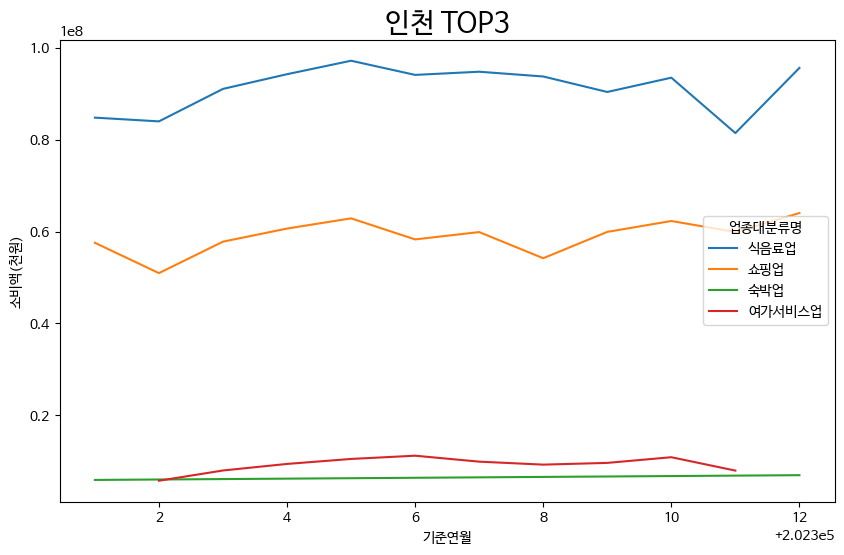

In [29]:
# 인천 & 상위 1위 - 3위 차트화
plt.figure(figsize=(10, 6))
# sns.barplot(data=IC_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
sns.lineplot(data=IC_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
plt.title('인천 TOP3', fontsize=20)
plt.show()

In [30]:
# 부산 & 소비액이 가장 높은 항목 1위 - 3위
df_consume_transition_BS_filter = df_consume_transition[(df_consume_transition['업종대분류명'] != '전체') & (df_consume_transition['지역구분'] == '부산')]
BS_top3_sectors = (
    df_consume_transition_BS_filter.groupby('기준연월')
    .apply(lambda x: x.nlargest(3, '소비액(천원)'))
    .reset_index(drop=True)
)
BS_top3_sectors[:10]

/tmp/ipykernel_86/4096860050.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, '소비액(천원)'))


,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802a9f8,202301,식음료업,125632365.0,부산
1,65d86688bb908e26c802a9fa,202301,쇼핑업,107216707.0,부산
2,65d86688bb908e26c802aa08,202301,숙박업,10273648.0,부산
3,65d86688bb908e26c802a9f2,202302,식음료업,122457023.0,부산
4,65d86688bb908e26c802a9f4,202302,쇼핑업,94358710.0,부산
5,65d86688bb908e26c802a9f7,202302,숙박업,10558776.0,부산
6,65d86688bb908e26c802a9ec,202303,식음료업,127989436.0,부산
7,65d86688bb908e26c802a9ee,202303,쇼핑업,107430880.0,부산
8,65d86688bb908e26c802a9ed,202303,여가서비스업,9410203.0,부산
9,65d86688bb908e26c802aa10,202304,식음료업,130727192.0,부산


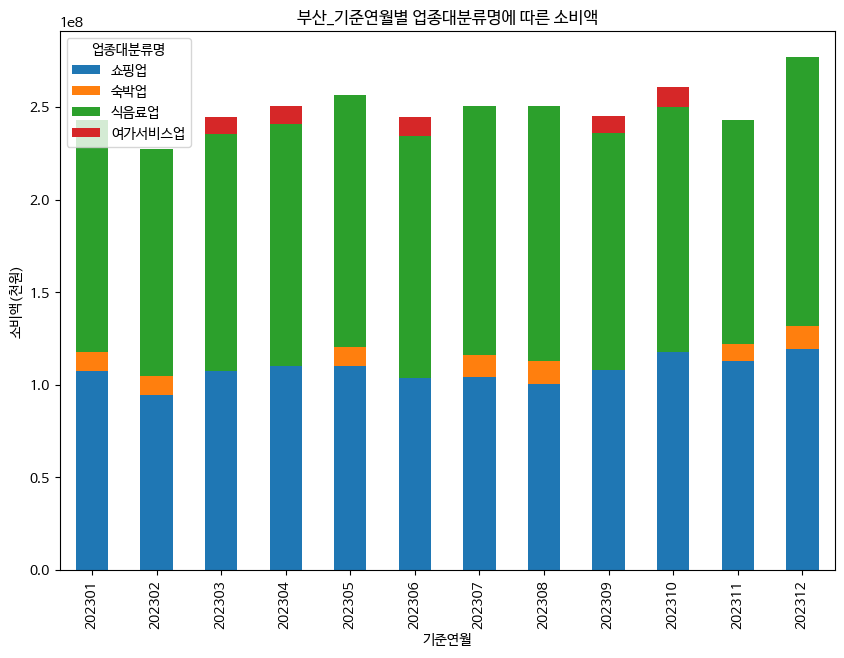

In [31]:
pivot_BS_top3_sectors = BS_top3_sectors.pivot_table(index='기준연월', columns='업종대분류명', values='소비액(천원)', aggfunc='sum')
pivot_BS_top3_sectors.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('부산_기준연월별 업종대분류명에 따른 소비액')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.legend(title='업종대분류명')
plt.show()

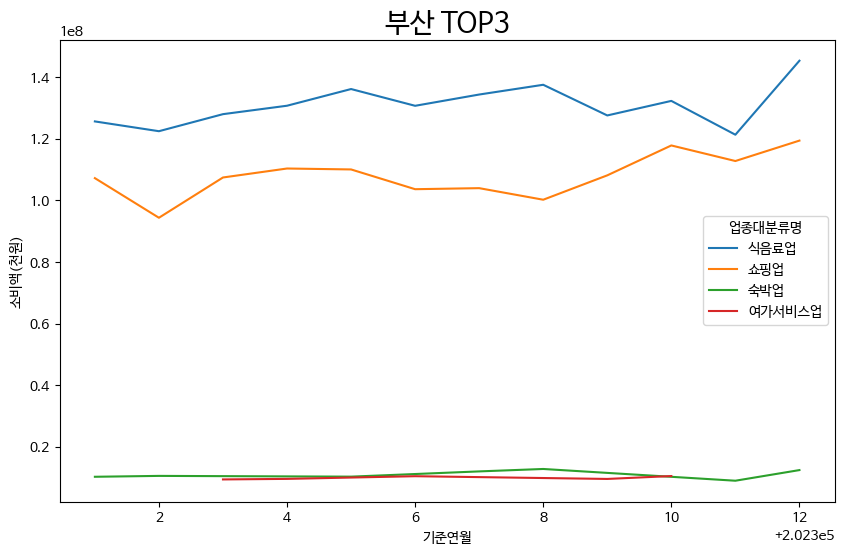

In [32]:
# 부산 & 상위 1위 - 3위 차트화
plt.figure(figsize=(10, 6))
# sns.barplot(data=BS_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
sns.lineplot(data=BS_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
plt.title('부산 TOP3', fontsize=20)
plt.show()

In [33]:
# 서울 & 소비액이 가장 높은 항목 1위 - 3위
df_consume_transition_SU_filter = df_consume_transition[(df_consume_transition['업종대분류명'] != '전체') & (df_consume_transition['지역구분'] == '서울')]
SU_top3_sectors = (
    df_consume_transition_SU_filter.groupby('기준연월')
    .apply(lambda x: x.nlargest(3, '소비액(천원)'))
    .reset_index(drop=True)
)
SU_top3_sectors[:10]

/tmp/ipykernel_86/1531560479.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, '소비액(천원)'))


,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802aa4c,202301,식음료업,528261224.0,서울
1,65d86688bb908e26c802aa4e,202301,쇼핑업,299398921.0,서울
2,65d86688bb908e26c802aa4f,202301,운송업,79958227.0,서울
3,65d86688bb908e26c802aa46,202302,식음료업,537993937.0,서울
4,65d86688bb908e26c802aa48,202302,쇼핑업,284494845.0,서울
5,65d86688bb908e26c802aa49,202302,운송업,76356775.0,서울
6,65d86688bb908e26c802aa40,202303,식음료업,588932836.0,서울
7,65d86688bb908e26c802aa42,202303,쇼핑업,319081679.0,서울
8,65d86688bb908e26c802aa43,202303,운송업,81637286.0,서울
9,65d86688bb908e26c802aa64,202304,식음료업,576514758.0,서울


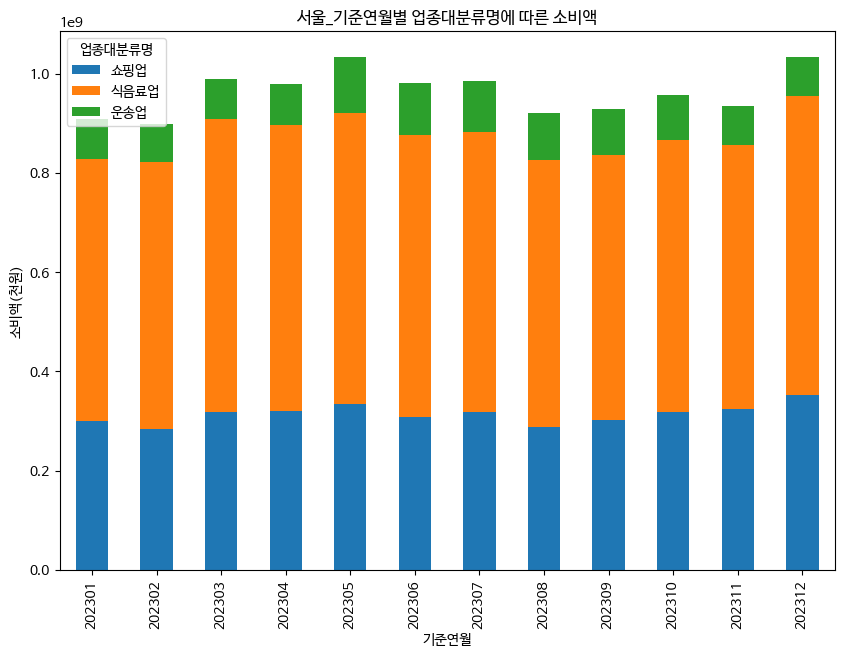

In [34]:
pivot_SU_top3_sectors = SU_top3_sectors.pivot_table(index='기준연월', columns='업종대분류명', values='소비액(천원)', aggfunc='sum')
pivot_SU_top3_sectors.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('서울_기준연월별 업종대분류명에 따른 소비액')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.legend(title='업종대분류명')
plt.show()

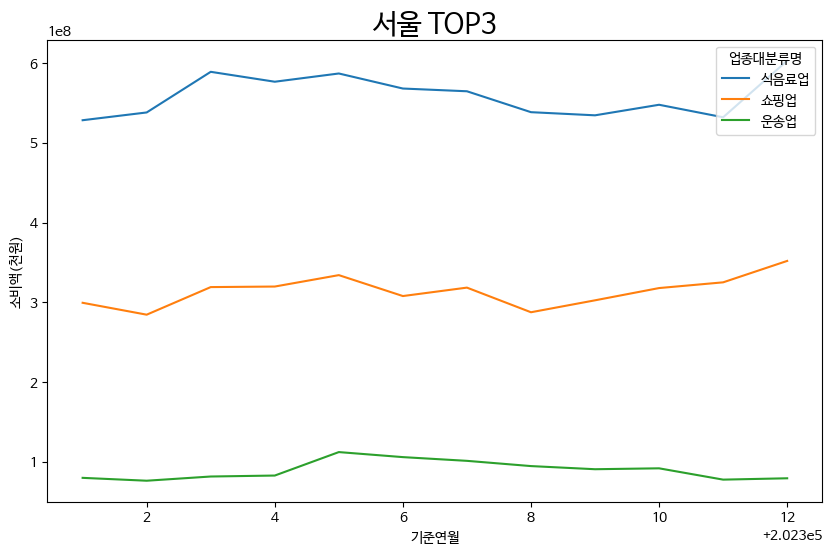

In [35]:
# 서울 & 상위 1위 - 3위 차트화
plt.figure(figsize=(10, 6))
# sns.barplot(data=SU_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
sns.lineplot(data=SU_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
plt.title('서울 TOP3', fontsize=20)
plt.show()

In [36]:
# 제주 & 소비액이 가장 높은 항목 1위 - 3위
df_consume_transition_JJ_filter = df_consume_transition[(df_consume_transition['업종대분류명'] != '전체') & (df_consume_transition['지역구분'] == '제주')]
JJ_top3_sectors = (
    df_consume_transition_JJ_filter.groupby('기준연월')
    .apply(lambda x: x.nlargest(4, '소비액(천원)'))
    .reset_index(drop=True)
)
JJ_top3_sectors[:10]

/tmp/ipykernel_86/1029413226.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(4, '소비액(천원)'))


,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802aaa0,202301,식음료업,36146556.0,제주
1,65d86688bb908e26c802aaa2,202301,쇼핑업,22456942.0,제주
2,65d86688bb908e26c802aab0,202301,숙박업,12448179.0,제주
3,65d86688bb908e26c802aaa3,202301,운송업,6669679.0,제주
4,65d86688bb908e26c802aa9a,202302,식음료업,36869745.0,제주
5,65d86688bb908e26c802aa9c,202302,쇼핑업,22193415.0,제주
6,65d86688bb908e26c802aa9f,202302,숙박업,12158258.0,제주
7,65d86688bb908e26c802aa90,202302,여가서비스업,6729671.0,제주
8,65d86688bb908e26c802aa94,202303,식음료업,37047860.0,제주
9,65d86688bb908e26c802aa96,202303,쇼핑업,24707282.0,제주


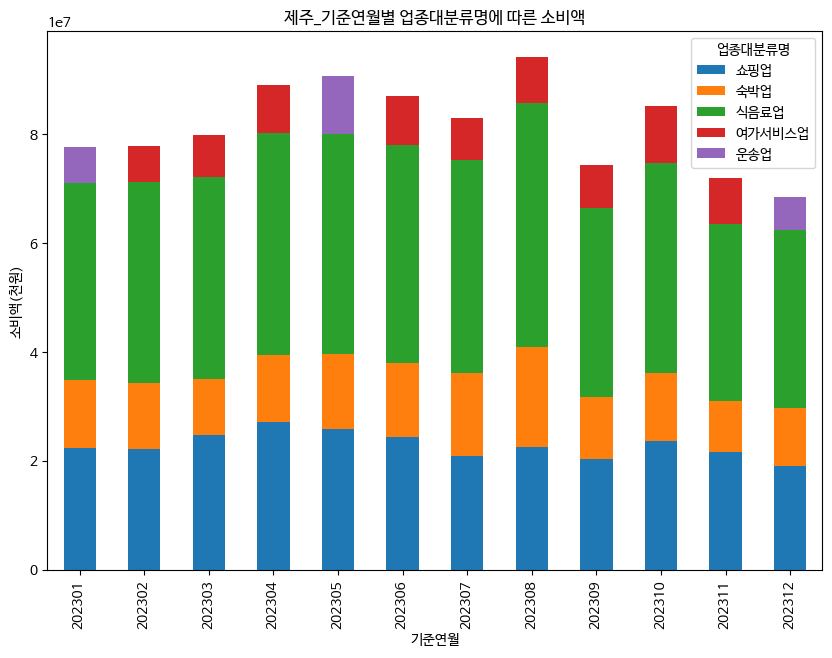

In [37]:
pivot_JJ_top3_sectors = JJ_top3_sectors.pivot_table(index='기준연월', columns='업종대분류명', values='소비액(천원)', aggfunc='sum')
pivot_JJ_top3_sectors.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('제주_기준연월별 업종대분류명에 따른 소비액')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.legend(title='업종대분류명')
plt.show()

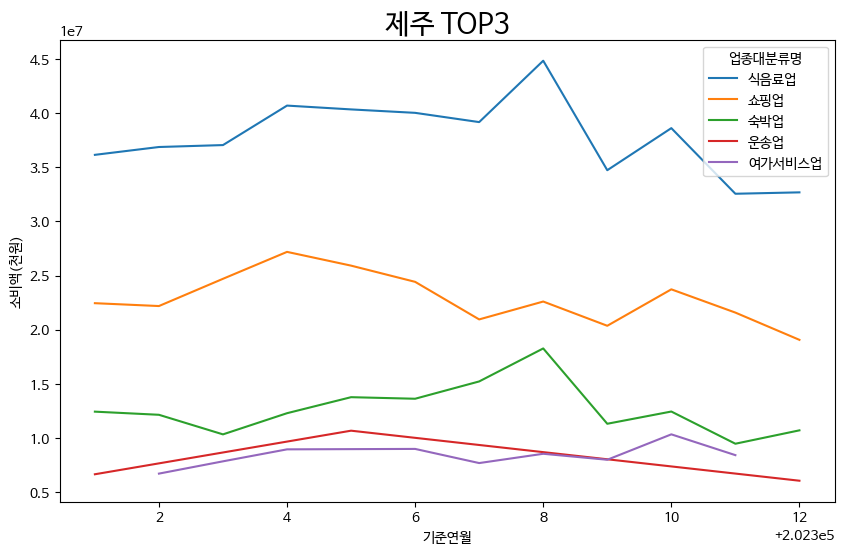

In [38]:
# 제주 & 상위 1위 - 3위 차트화
plt.figure(figsize=(10, 6))
# sns.barplot(data=JJ_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
sns.lineplot(data=JJ_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
plt.title('제주 TOP3', fontsize=20)
plt.show()

In [39]:
# 강원 & 소비액이 가장 높은 항목 1위 - 3위
df_consume_transition_GW_filter = df_consume_transition[(df_consume_transition['업종대분류명'] != '전체') & (df_consume_transition['지역구분'] == '강원')]
GW_top3_sectors = (
    df_consume_transition_GW_filter.groupby('기준연월')
    .apply(lambda x: x.nlargest(3, '소비액(천원)'))
    .reset_index(drop=True)
)
GW_top3_sectors[:]

/tmp/ipykernel_86/359896220.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, '소비액(천원)'))


,_id,기준연월,업종대분류명,소비액(천원),지역구분
0,65d86688bb908e26c802aaf5,202301,식음료업,56357544.0,강원
1,65d86688bb908e26c802ab04,202301,숙박업,22262889.0,강원
2,65d86688bb908e26c802aaf7,202301,쇼핑업,14314328.0,강원
3,65d86688bb908e26c802aae4,202302,식음료업,56329509.0,강원
4,65d86688bb908e26c802aaf3,202302,숙박업,18559891.0,강원
5,65d86688bb908e26c802aaf1,202302,쇼핑업,12654560.0,강원
6,65d86688bb908e26c802aae9,202303,식음료업,50554545.0,강원
7,65d86688bb908e26c802aaea,202303,여가서비스업,15807408.0,강원
8,65d86688bb908e26c802aaeb,202303,쇼핑업,13595242.0,강원
9,65d86688bb908e26c802ab0d,202304,식음료업,58426095.0,강원


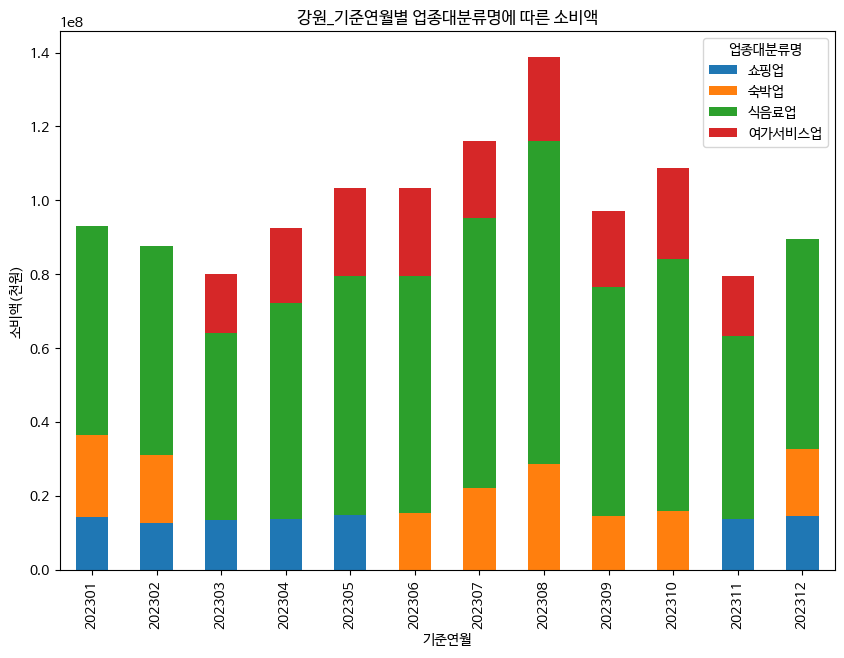

In [40]:
pivot_GW_top3_sectors = GW_top3_sectors.pivot_table(index='기준연월', columns='업종대분류명', values='소비액(천원)', aggfunc='sum')
pivot_GW_top3_sectors.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('강원_기준연월별 업종대분류명에 따른 소비액')
plt.xlabel('기준연월')
plt.ylabel('소비액(천원)')
plt.legend(title='업종대분류명')
plt.show()

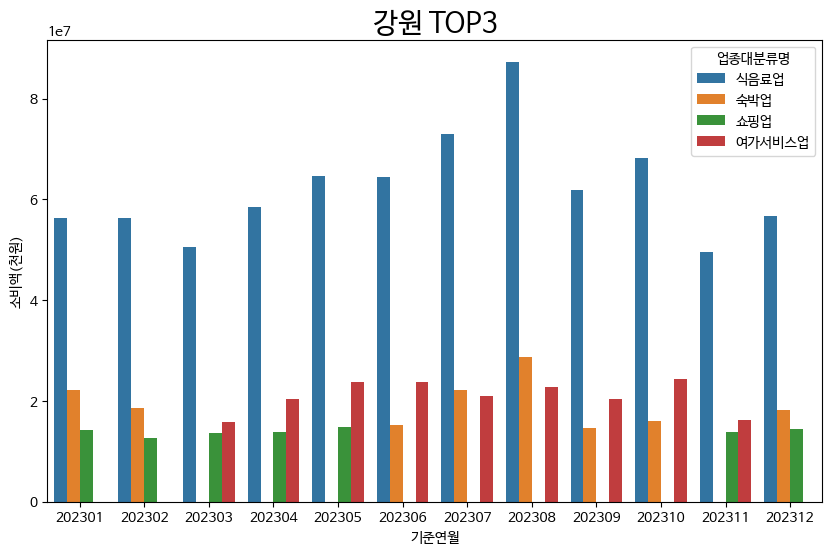

In [41]:
# 강원 & 상위 1위 - 3위 차트화
plt.figure(figsize=(10, 6))
sns.barplot(data=GW_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
# sns.lineplot(data=GW_top3_sectors, x='기준연월', y='소비액(천원)', hue='업종대분류명', estimator=sum)
plt.title('강원 TOP3', fontsize=20)
plt.show()

## ------------------------------------------------------------------------

## 전국 대비 관광 소비 추이 - consume_transition_entire_2023

In [42]:
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['consume_transition_entire_2023']
data = collection.find()
df_consume_transition_entire = pd.DataFrame(data)
df_consume_transition_entire[:5]

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
0,65d8667bbb908e26c802a92d,202301,인천광역시,156104.0,3193641.0,4.9,인천
1,65d8667bbb908e26c802a92e,202302,인천광역시,148695.0,3112274.0,4.8,인천
2,65d8667bbb908e26c802a92f,202303,인천광역시,164691.0,3478043.0,4.7,인천
3,65d8667bbb908e26c802a930,202304,인천광역시,172693.0,3619532.0,4.8,인천
4,65d8667bbb908e26c802a931,202305,인천광역시,180669.0,3803919.0,4.7,인천


### 3번 중간 점검 : '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
- 결측치와 이상치 확인
- 전체적인 컬럼 확인
- 지역구분 컬럼 확인
- 지역별 & 월별 전국 대비 관광소비율 높은 월 정리
  - 인천 : 7월(4.9%), 9월(4.9%), 12월(4.9%)
  - 부산 : 12월(8.2%), 1월(8.1%), 2월(7.8%)
  - 서울 : 12월(31.6%), 2월(31.2%), 1월(31.0%)
  - 제주 : 8월(2.9%), 2월(2.7%), 6월(2.7%)
  - 강원 : 8월(4.3%), 7월(3.6%), 10월(3.4%)

In [43]:
# 결측치와 이상치 확인     -> 없음 확인
df_consume_transition_entire.isnull().sum()

_id              0
기준연월             0
지역명              0
관광소비액(백만원)       0
전국 관광소비액(백만원)    0
전국 대비 관광소비율      0
지역구분             0
dtype: int64

In [44]:
# 컬럼 확인     -> '_id', '기준연월', '지역명', '관광소비액(백만원)', '전국 관광소비액(백만원)', '전국 대비 관광소비율', '지역구분'
df_consume_transition_entire.columns

Index(['_id', '기준연월', '지역명', '관광소비액(백만원)', '전국 관광소비액(백만원)', '전국 대비 관광소비율',
       '지역구분'],
      dtype='object')

In [45]:
# 지역구분 컬럼 확인     -> '인천', '부산', '서울', '제주', '강원'
df_consume_transition_entire['지역구분'].unique()

array(['인천', '부산', '서울', '제주', '강원'], dtype=object)

In [46]:
# 인천 -> '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
df_consume_transition_entire_IC = df_consume_transition_entire[df_consume_transition_entire['지역구분'] == '인천'].sort_values('전국 대비 관광소비율', ascending=False)
df_consume_transition_entire_IC_whole = df_consume_transition_entire_IC.sort_values(by=['전국 대비 관광소비율', '전국 관광소비액(백만원)'], ascending=[False, False])
df_consume_transition_entire_IC_whole

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
6,65d8667bbb908e26c802a933,202307,인천광역시,174388.0,3589248.0,4.9,인천
11,65d8667bbb908e26c802a938,202312,인천광역시,174935.0,3565655.0,4.9,인천
8,65d8667bbb908e26c802a935,202309,인천광역시,168310.0,3456150.0,4.9,인천
0,65d8667bbb908e26c802a92d,202301,인천광역시,156104.0,3193641.0,4.9,인천
9,65d8667bbb908e26c802a936,202310,인천광역시,176363.0,3672830.0,4.8,인천
3,65d8667bbb908e26c802a930,202304,인천광역시,172693.0,3619532.0,4.8,인천
5,65d8667bbb908e26c802a932,202306,인천광역시,172816.0,3569349.0,4.8,인천
7,65d8667bbb908e26c802a934,202308,인천광역시,167264.0,3506755.0,4.8,인천
1,65d8667bbb908e26c802a92e,202302,인천광역시,148695.0,3112274.0,4.8,인천
4,65d8667bbb908e26c802a931,202305,인천광역시,180669.0,3803919.0,4.7,인천


In [47]:
# 부산 -> '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
df_consume_transition_entire_BS = df_consume_transition_entire[df_consume_transition_entire['지역구분'] == '부산'].sort_values('전국 대비 관광소비율', ascending=False)
df_consume_transition_entire_BS_whole = df_consume_transition_entire_BS.sort_values(by=['전국 대비 관광소비율', '전국 관광소비액(백만원)'], ascending=[False, False])
df_consume_transition_entire_BS_whole

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
23,65d8667bbb908e26c802a944,202312,부산광역시,292906.0,3565655.0,8.2,부산
12,65d8667bbb908e26c802a939,202301,부산광역시,258888.0,3193641.0,8.1,부산
13,65d8667bbb908e26c802a93a,202302,부산광역시,243923.0,3112274.0,7.8,부산
22,65d8667bbb908e26c802a943,202311,부산광역시,258185.0,3352999.0,7.7,부산
21,65d8667bbb908e26c802a942,202310,부산광역시,278167.0,3672830.0,7.6,부산
19,65d8667bbb908e26c802a940,202308,부산광역시,268179.0,3506755.0,7.6,부산
20,65d8667bbb908e26c802a941,202309,부산광역시,261700.0,3456150.0,7.6,부산
18,65d8667bbb908e26c802a93f,202307,부산광역시,268419.0,3589248.0,7.5,부산
14,65d8667bbb908e26c802a93b,202303,부산광역시,261158.0,3478043.0,7.5,부산
15,65d8667bbb908e26c802a93c,202304,부산광역시,267174.0,3619532.0,7.4,부산


In [48]:
# 서울 -> '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
df_consume_transition_entire_SU = df_consume_transition_entire[df_consume_transition_entire['지역구분'] == '서울'].sort_values('전국 대비 관광소비율', ascending=False)
df_consume_transition_entire_SU_whole = df_consume_transition_entire_SU.sort_values(by=['전국 대비 관광소비율', '전국 관광소비액(백만원)'], ascending=[False, False])
df_consume_transition_entire_SU_whole

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
35,65d8667bbb908e26c802a950,202312,서울특별시,1127462.0,3565655.0,31.6,서울
25,65d8667bbb908e26c802a946,202302,서울특별시,972234.0,3112274.0,31.2,서울
24,65d8667bbb908e26c802a945,202301,서울특별시,989276.0,3193641.0,31.0,서울
26,65d8667bbb908e26c802a947,202303,서울특별시,1061652.0,3478043.0,30.5,서울
34,65d8667bbb908e26c802a94f,202311,서울특별시,1007137.0,3352999.0,30.0,서울
30,65d8667bbb908e26c802a94b,202307,서울특별시,1070818.0,3589248.0,29.8,서울
29,65d8667bbb908e26c802a94a,202306,서울특별시,1061383.0,3569349.0,29.7,서울
28,65d8667bbb908e26c802a949,202305,서울특별시,1116071.0,3803919.0,29.3,서울
27,65d8667bbb908e26c802a948,202304,서울특별시,1053476.0,3619532.0,29.1,서울
32,65d8667bbb908e26c802a94d,202309,서울특별시,1001844.0,3456150.0,29.0,서울


In [49]:
# 제주 -> '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
df_consume_transition_entire_JJ = df_consume_transition_entire[df_consume_transition_entire['지역구분'] == '제주'].sort_values('전국 대비 관광소비율', ascending=False)
df_consume_transition_entire_JJ_whole = df_consume_transition_entire_JJ.sort_values(by=['전국 대비 관광소비율', '전국 관광소비액(백만원)'], ascending=[False, False])
df_consume_transition_entire_JJ_whole

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
43,65d8667bbb908e26c802a958,202308,제주특별자치도,102788.0,3506755.0,2.9,제주
41,65d8667bbb908e26c802a956,202306,제주특별자치도,96518.0,3569349.0,2.7,제주
37,65d8667bbb908e26c802a952,202302,제주특별자치도,84610.0,3112274.0,2.7,제주
40,65d8667bbb908e26c802a955,202305,제주특별자치도,100666.0,3803919.0,2.6,제주
39,65d8667bbb908e26c802a954,202304,제주특별자치도,95733.0,3619532.0,2.6,제주
36,65d8667bbb908e26c802a951,202301,제주특별자치도,83872.0,3193641.0,2.6,제주
45,65d8667bbb908e26c802a95a,202310,제주특별자치도,92968.0,3672830.0,2.5,제주
42,65d8667bbb908e26c802a957,202307,제주특별자치도,91259.0,3589248.0,2.5,제주
38,65d8667bbb908e26c802a953,202303,제주특별자치도,86661.0,3478043.0,2.5,제주
44,65d8667bbb908e26c802a959,202309,제주특별자치도,81507.0,3456150.0,2.4,제주


In [50]:
# 강원 -> '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
df_consume_transition_entire_GW = df_consume_transition_entire[df_consume_transition_entire['지역구분'] == '강원'].sort_values('전국 대비 관광소비율', ascending=False)
df_consume_transition_entire_GW_whole = df_consume_transition_entire_GW.sort_values(by=['전국 대비 관광소비율', '전국 관광소비액(백만원)'], ascending=[False, False])
df_consume_transition_entire_GW_whole

,_id,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,지역구분
55,65d8667bbb908e26c802a964,202308,강원특별자치도,152452.0,3506755.0,4.3,강원
54,65d8667bbb908e26c802a963,202307,강원특별자치도,130557.0,3589248.0,3.6,강원
57,65d8667bbb908e26c802a966,202310,강원특별자치도,123845.0,3672830.0,3.4,강원
53,65d8667bbb908e26c802a962,202306,강원특별자치도,116836.0,3569349.0,3.3,강원
56,65d8667bbb908e26c802a965,202309,강원특별자치도,110187.0,3456150.0,3.2,강원
48,65d8667bbb908e26c802a95d,202301,강원특별자치도,100757.0,3193641.0,3.2,강원
52,65d8667bbb908e26c802a961,202305,강원특별자치도,118153.0,3803919.0,3.1,강원
49,65d8667bbb908e26c802a95e,202302,강원특별자치도,97582.0,3112274.0,3.1,강원
51,65d8667bbb908e26c802a960,202304,강원특별자치도,104424.0,3619532.0,2.9,강원
59,65d8667bbb908e26c802a968,202312,강원특별자치도,98166.0,3565655.0,2.8,강원


## ------------------------------------------------------------------------

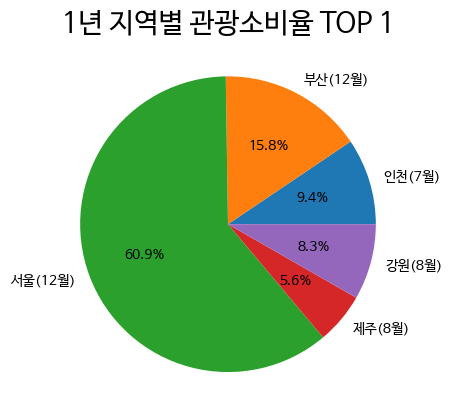

In [51]:
# 3번 각 지역별 전국 대비 관광소비율 상위 1위 비교(파이 차트)
IC = df_consume_transition_entire_IC_whole.iloc[0,5]
BS = df_consume_transition_entire_BS_whole.iloc[0,5]
SU = df_consume_transition_entire_SU_whole.iloc[0,5]
JJ = df_consume_transition_entire_JJ_whole.iloc[0,5]
GW = df_consume_transition_entire_GW_whole.iloc[0,5]
data = [IC, BS,SU, JJ, GW]
labels = ['인천(7월)', '부산(12월)', '서울(12월)', '제주(8월)', '강원(8월)']
plt.pie(data, labels=labels, autopct='%.1f%%')
plt.title('1년 지역별 관광소비율 TOP 1', fontsize=20)
plt.show()

# 1번 중간 점검 : 지역별 상위 1-3위 소비 항목
- 인천 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 면세점
- 부산 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 레저용품쇼핑
- 서울 -> 가장 많이 소비하는 항목 : 식음료, 대형쇼핑몰, 항공운송
- 제주 -> 가장 많이 소비하는 항목 : 식음료, 면세점, 골프장
- 강원 -> 가장 많이 소비하는 항목 : 식음료, 골프장, 콘도

# 2번 중간 점검 : 지역별 소비액이 가장 높은 항목을 전체에서 %인지 비교
- 인천 : 식음료업, 쇼핑업 / 1월,12월 제외하고 여가서비스업 순으로 많음.
- 부산 : 식음료업, 쇼핑업 / 3,4,6,9,10월 제외하고 숙박업 순으로 많음.
- 서울 : 식음료업, 쇼핑업, 운송업
- 제주 : 식음료업, 쇼핑업, 숙박업
- 강원 : 식음료업, 3월 - 11월까지 여가서비스업이 대략 2위를 차지한다.

# 3번 중간 점검 : '전국 대비 관광소비율'이 높으며 관광소비액을 최대인 월 정리
- 인천 : 7월(4.9%), 9월(4.9%), 12월(4.9%)
- 부산 : 12월(8.2%), 1월(8.1%), 2월(7.8%)
- 서울 : 12월(31.6%), 2월(31.2%), 1월(31.0%)
- 제주 : 8월(2.9%), 2월(2.7%), 6월(2.7%)
- 강원 : 8월(4.3%), 7월(3.6%), 10월(3.4%)